In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import math

#A description of the dataset lists the attributes and their descriptions:

##### Client Attributes
* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

##### Last Telephone Contact
* contact: contact communication type (categorical: "cellular","telephone")
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Other Attributes
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

##### Social and Economic Context
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)     
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

In [47]:
# Load data
url = 'https://drive.google.com/uc?id=1q8dN7trVpNq-LBFEMPED9WGoaLlJFzPg'
df = pd.read_csv(url)
print(df.head())
print(f" Jumlah baris: {df.shape[0]} | Jumlah kolom: {df.shape[1]}")

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [48]:
# Melihat informasi struktur dataset
print("\n Informasi umum dataset:")
df.info()


 Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.

In [49]:
# Melihat jumlah nilai unik dan missing value
print("\n Ringkasan jumlah nilai unik per kolom:")
print(df.nunique())

print("\n Jumlah missing value per kolom:")
print(df.isnull().sum())


 Ringkasan jumlah nilai unik per kolom:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

 Jumlah missing value per kolom:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: in

In [50]:
# Statistik deskriptif untuk kolom numerik
print("\n Statistik deskriptif variabel numerik:")
display(df.describe())


 Statistik deskriptif variabel numerik:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,85401.579955,-40.502600,3180.107207,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,26471.506796,4.628198,2086.690436,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000


In [51]:
# Statistik deskriptif untuk kolom kategorikal
print("\n Statistik deskriptif variabel kategorikal:")
display(df.describe(include=['object']))


 Statistik deskriptif variabel kategorikal:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [52]:
# Mengecek distribusi kolom numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\n Kolom numerik: {list(numerical_features)}")


 Kolom numerik: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


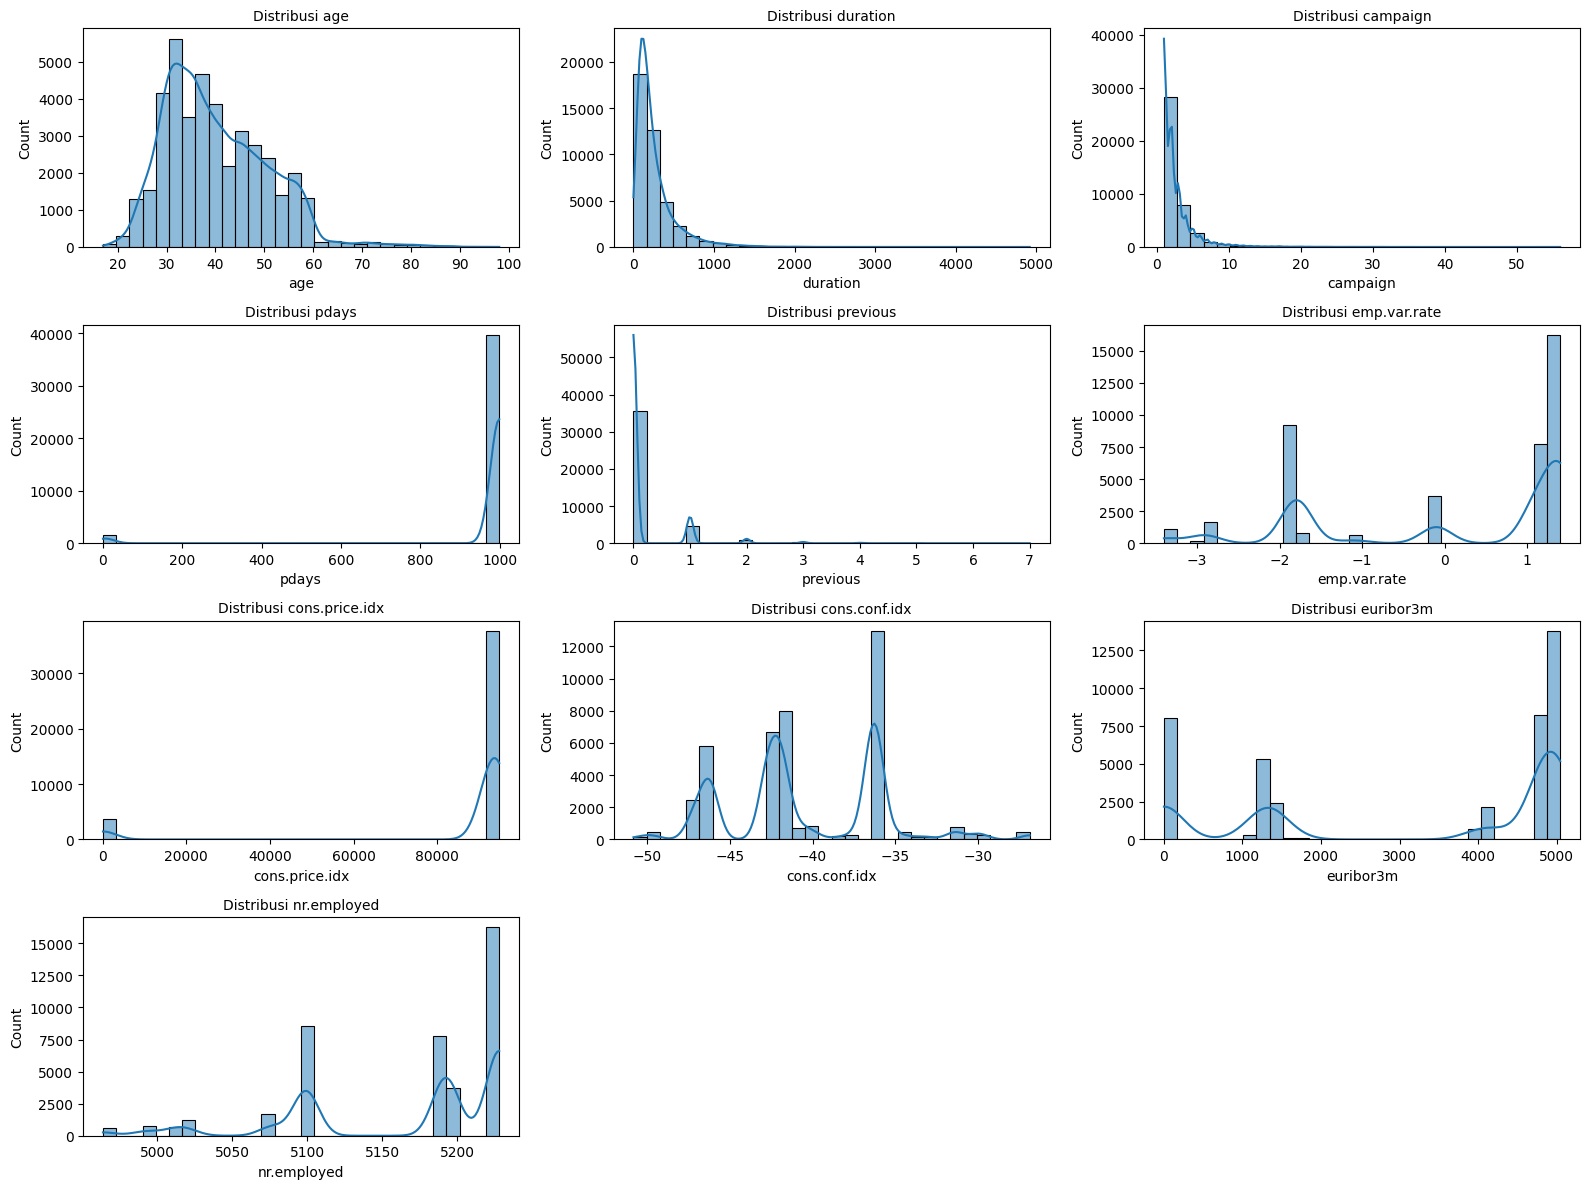

In [53]:
# Hitung jumlah subplot yang dibutuhkan
n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

plt.figure(figsize=(16, n_rows * 3))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}", fontsize=10)

plt.tight_layout()
plt.show()


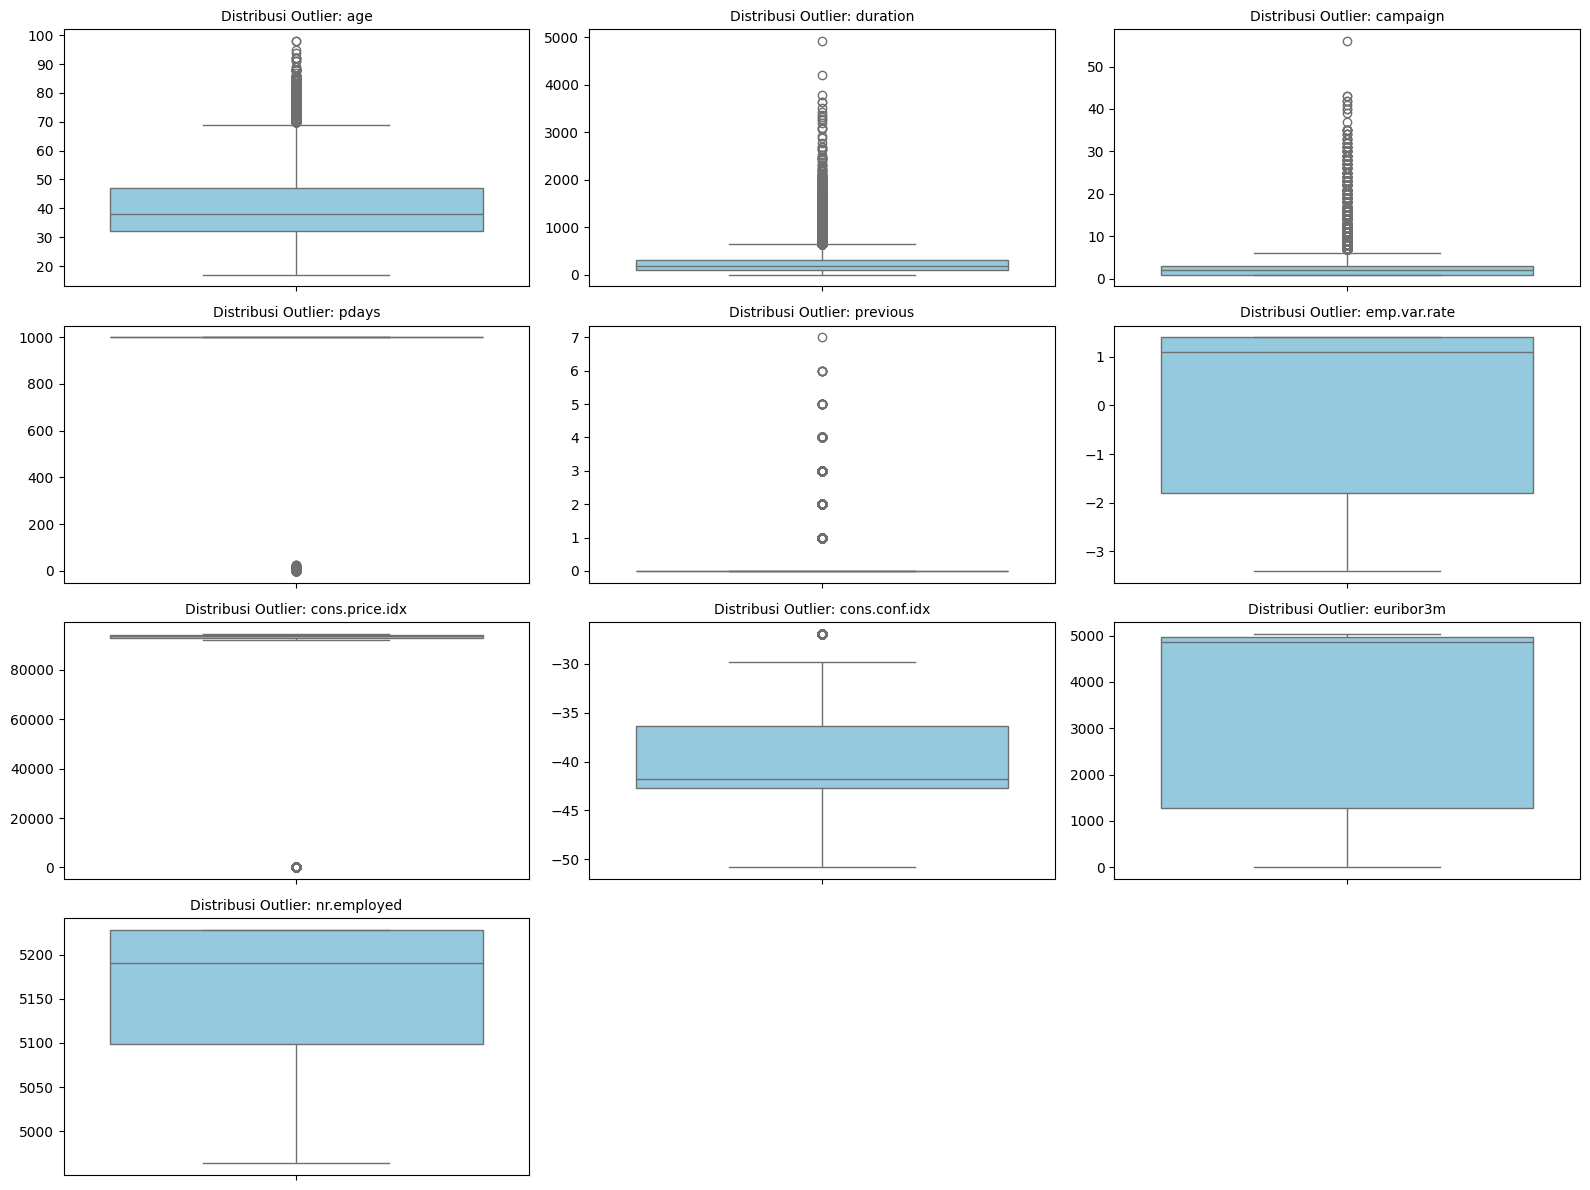

In [54]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Distribusi Outlier: {col}", fontsize=10)
    plt.ylabel("")
plt.tight_layout()
plt.show()

In [55]:
# Identifikasi kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
print(f"\n Kolom kategorikal: {list(categorical_features)}")


🔹 Kolom kategorikal: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [56]:
# Frekuensi kategori untuk tiap kolom
for col in categorical_features:
    print(f"\n Distribusi nilai kolom '{col}':")
    print(df[col].value_counts(normalize=True).round(3) * 100)


 Distribusi nilai kolom 'job':
job
admin.           25.3
blue-collar      22.5
technician       16.4
services          9.6
management        7.1
retired           4.2
entrepreneur      3.5
self-employed     3.5
housemaid         2.6
unemployed        2.5
student           2.1
unknown           0.8
Name: proportion, dtype: float64

 Distribusi nilai kolom 'marital':
marital
married     60.5
single      28.1
divorced    11.2
unknown      0.2
Name: proportion, dtype: float64

 Distribusi nilai kolom 'education':
education
university.degree      29.5
high.school            23.1
basic.9y               14.7
professional.course    12.7
basic.4y               10.1
basic.6y                5.6
unknown                 4.2
illiterate              0.0
Name: proportion, dtype: float64

 Distribusi nilai kolom 'default':
default
no         79.1
unknown    20.9
yes         0.0
Name: proportion, dtype: float64

 Distribusi nilai kolom 'housing':
housing
yes        52.4
no         45.2
unknown     2.4


/tmp/ipython-input-979972344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-979972344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-979972344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-979972344.py:5: FutureWarning: 

Passing `palette` without assigning 

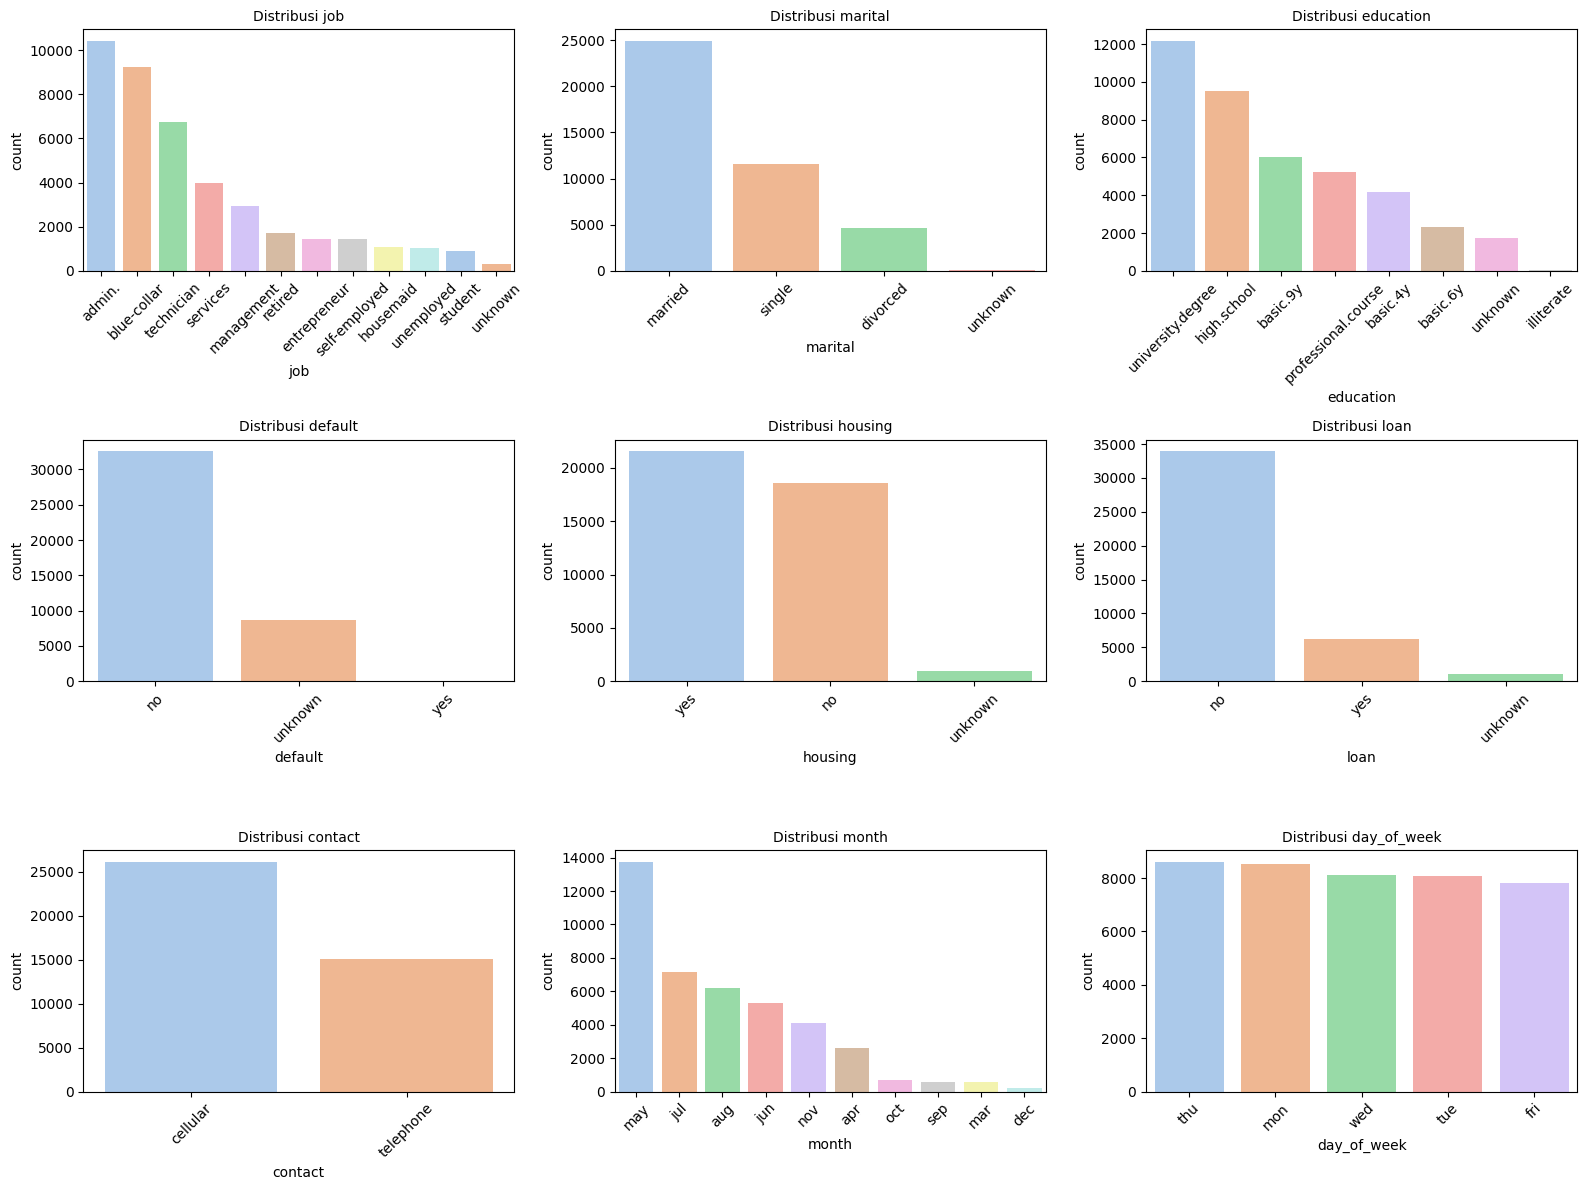

In [57]:
# Visualisasi distribusi kategori menggunakan barplot
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features[:9], 1):  # tampilkan 9 kolom pertama
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f"Distribusi {col}", fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

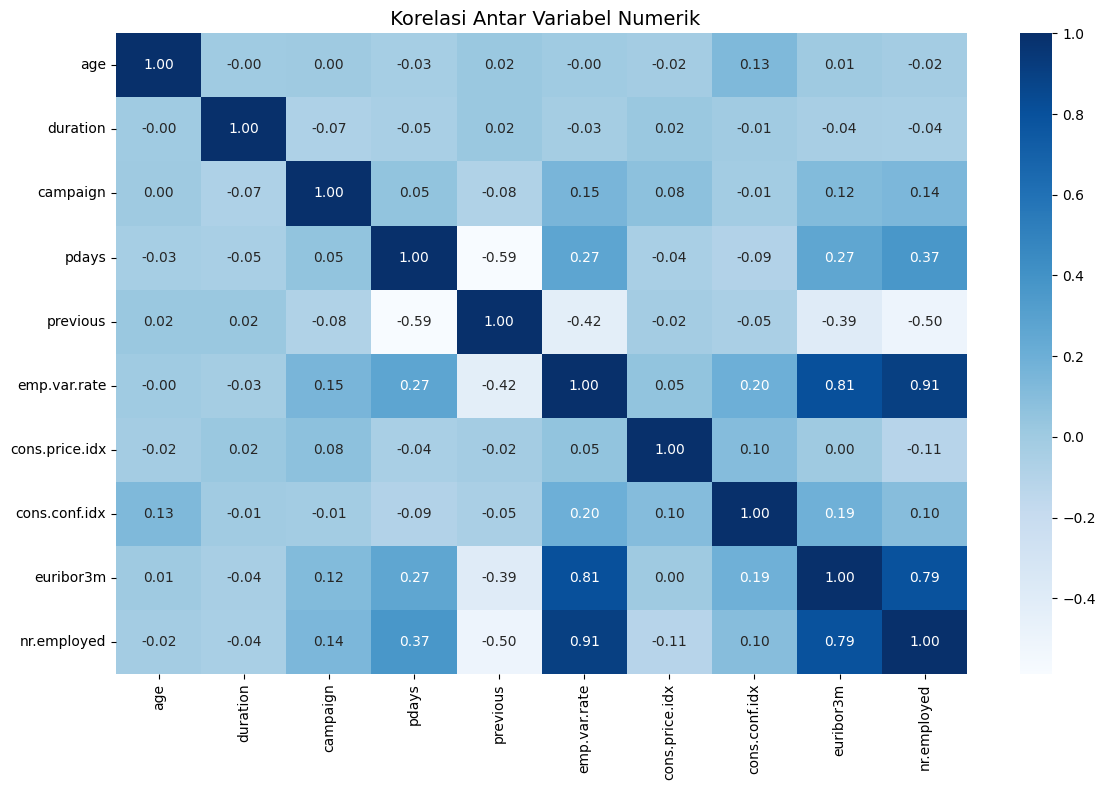

In [58]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title(" Korelasi Antar Variabel Numerik", fontsize=14)
plt.tight_layout()
plt.show()

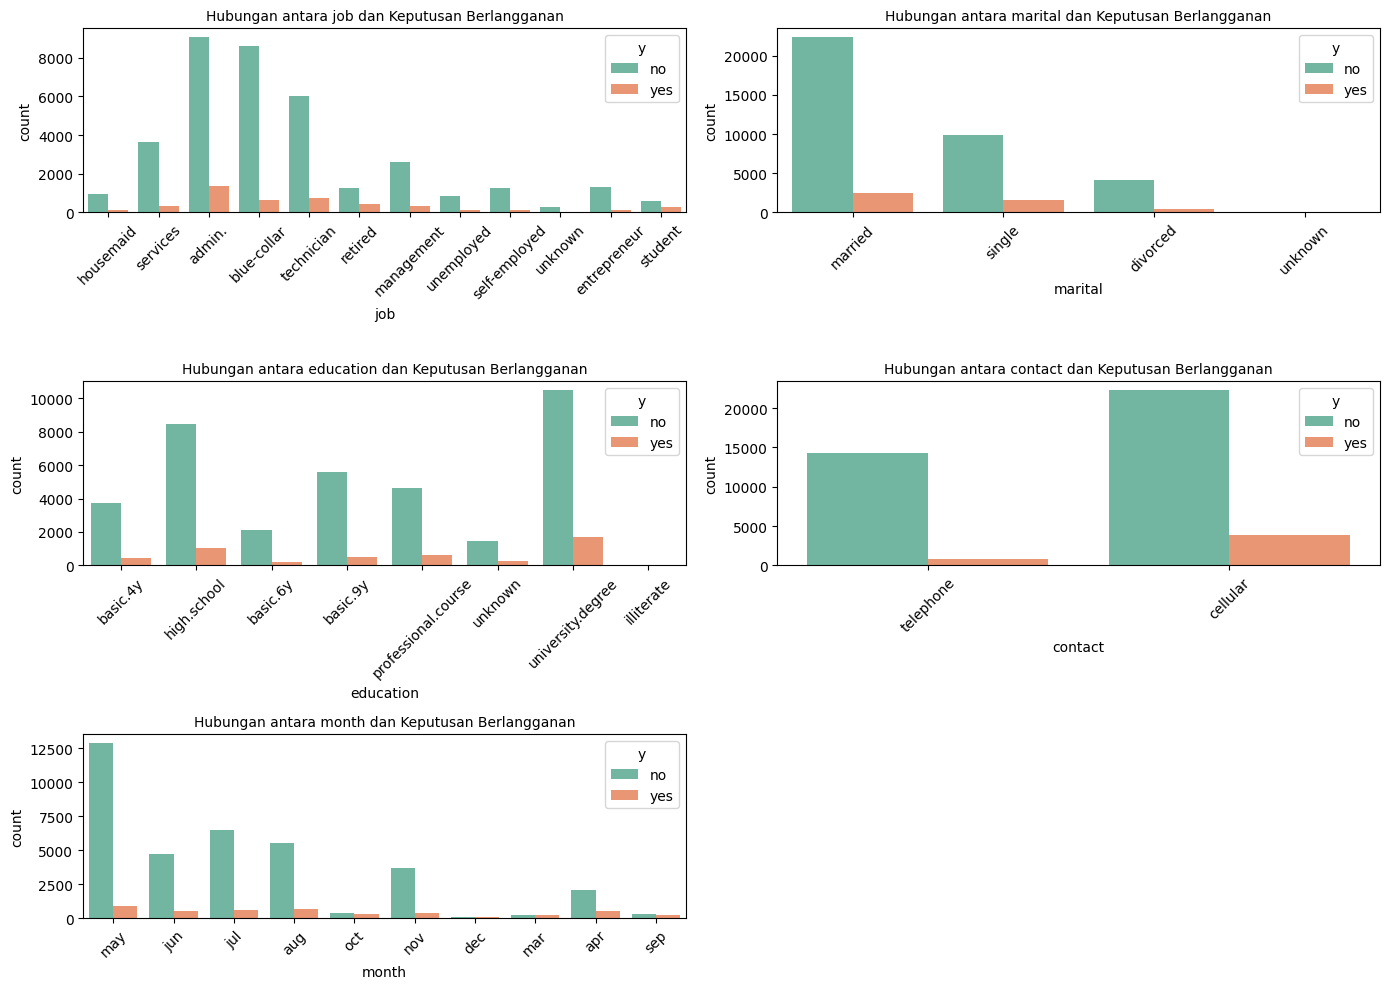

In [59]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['job', 'marital', 'education', 'contact', 'month'], 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='y', data=df, palette='Set2')
    plt.title(f"Hubungan antara {col} dan Keputusan Berlangganan", fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1269025315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='coolwarm')


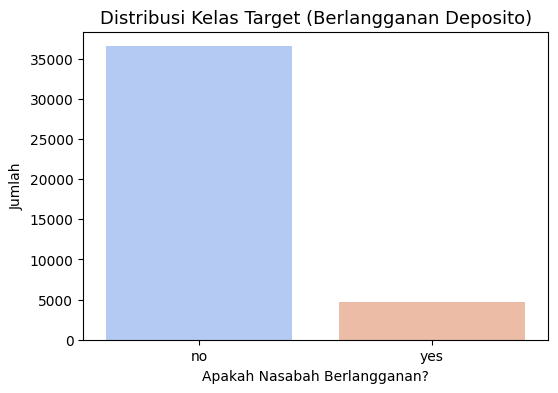

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='coolwarm')
plt.title("Distribusi Kelas Target (Berlangganan Deposito)", fontsize=13)
plt.xlabel("Apakah Nasabah Berlangganan?")
plt.ylabel("Jumlah")
plt.show()
